In [3]:
from spot2intensity import Point, Rectangle, Grid, plot_patches,create_patches,create_circle_patches\
,rectangle_reshape,find_circle_coordinates
from data_180218 import COLLECTIONS
from utils import ensure_dir
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import copy
import numpy as np
from pprint import pprint
from skimage import feature
from skimage.filters import roberts
import skimage.io



In [4]:
pprint(COLLECTIONS)

{'slide_37': <spot2intensity.Collection object at 0x7f99558a85d0>}


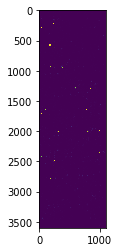

In [11]:
this_collection = COLLECTIONS['slide_37']
fp = this_collection.png_path
import skimage.io
import cv2
img = skimage.io.imread(fp)
r,g,b=np.dsplit(img,3)
#plt.imshow(r)
#plt.show()
r = r.squeeze()
g = g.squeeze()
b = b.squeeze()

plt.imshow(g)
plt.show()

In [6]:
this_collection = COLLECTIONS['slide_37']
spots = this_collection.pd_complete_spots()

Claculating grid starting at:(43,98)


In [7]:
directory = "data/{}/{}/".format(this_collection.study,this_collection.name)
ensure_dir(directory)
#save data
inte = spots.pivot(index="Row", columns="Column", values="intensities")
inte.to_csv("{}intensity.tsv".format(directory), sep='\t')
int2 = spots.pivot(index="Row", columns="Column", values="intensities2")
int2.to_csv("{}intensity2.tsv".format(directory), sep='\t')
circ_q = spots.pivot(index="Row", columns="Column", values="circle_qual")
circ_q.to_csv("{}circle_quality.tsv".format(directory), sep='\t')
std2 = spots.pivot(index="Row", columns="Column", values="std_intensities2")
std2.to_csv("{}intensity2_std.tsv".format(directory), sep='\t')

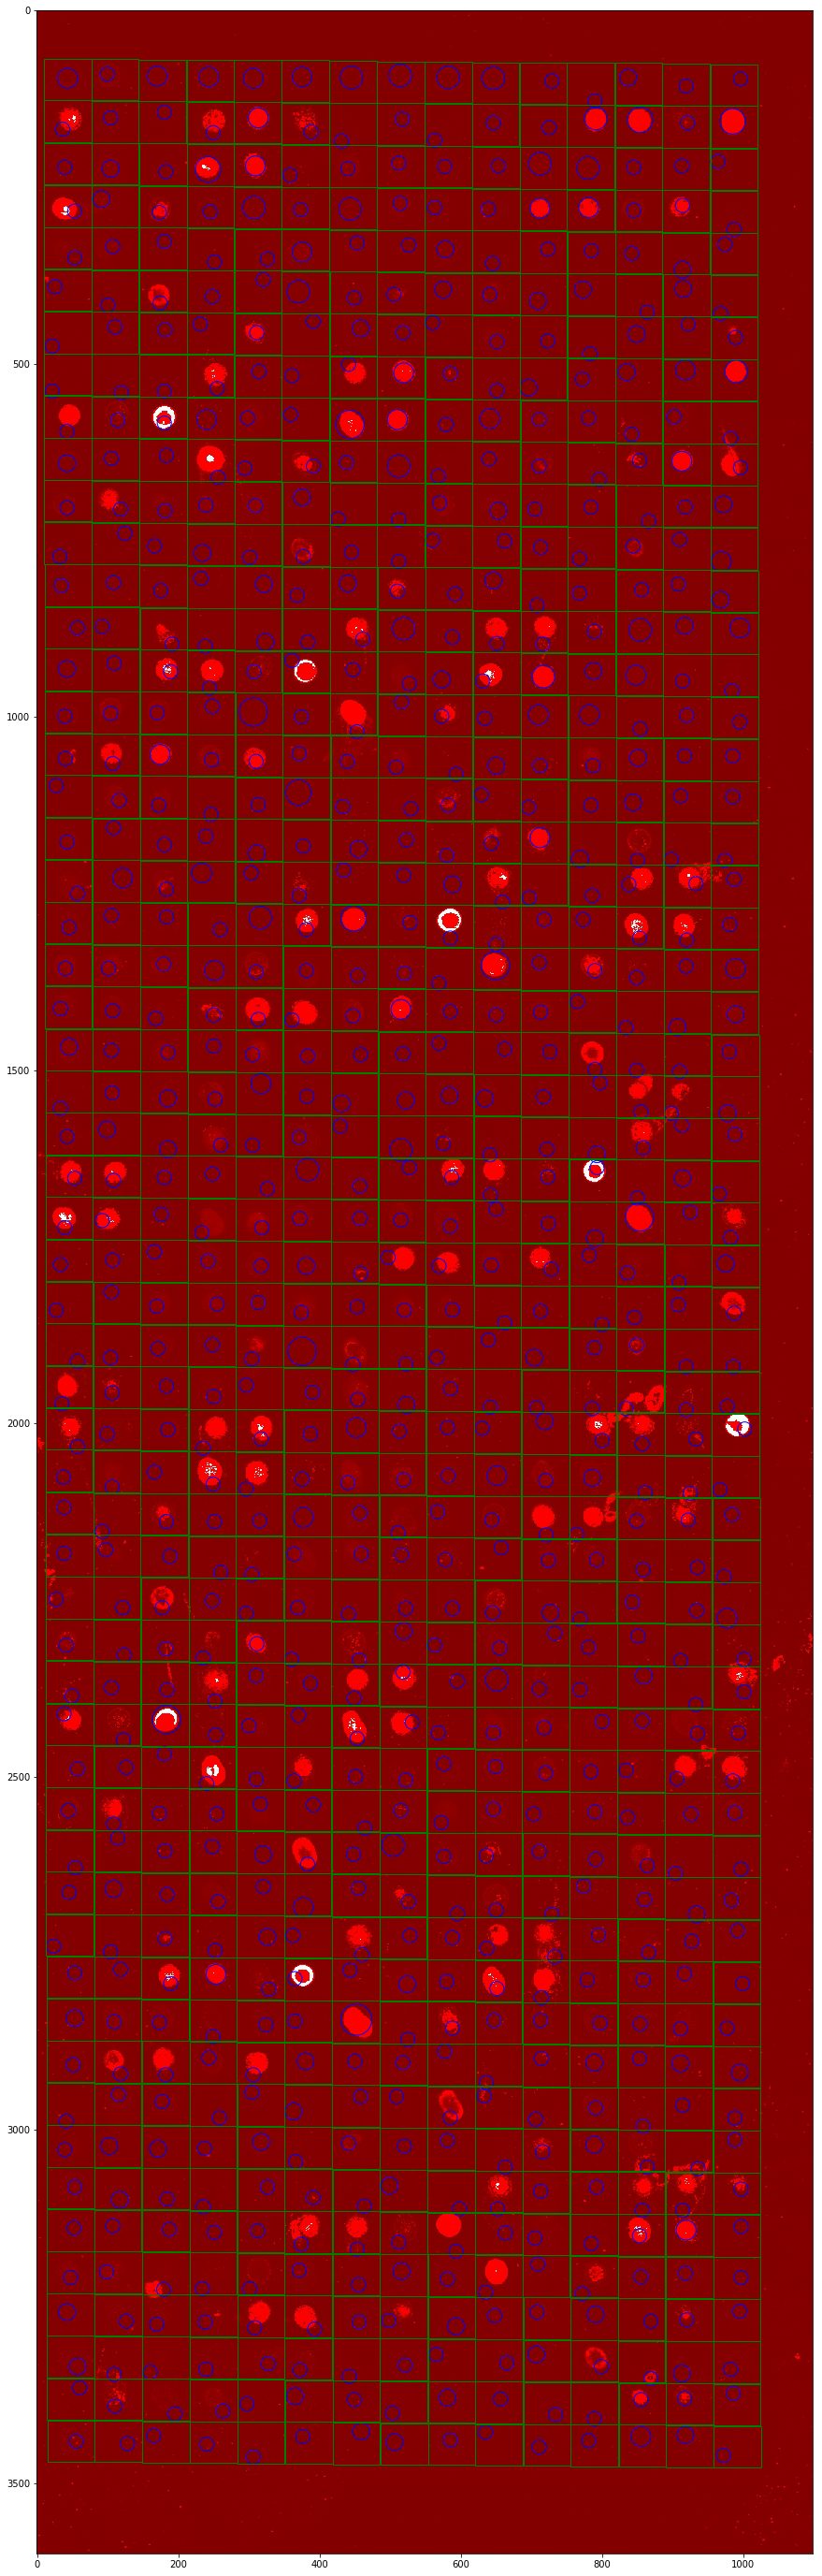

In [8]:
fig,ax = plt.subplots(1, figsize=(50,50))

th = this_collection.image
#th[th>150]=0

ax.imshow(th)
#spots_test = spots[spots["Name"] in ["Pep 61_1.0",
#                                     "Pep 61_0.5",
#                                     "Pep 61_0.25",
#                                    ]]
#spots_test = spots[spots["Name"] == "Pep 61_0.5"]
spots_test = spots
for i,spot in spots_test.iterrows():
    circ = create_circle_patches(spot["circles"].center,spot["circles"].radius)
    rec = patches.Rectangle((spot["squares"].get_xy()),
                            spot["squares"].get_width(),
                            spot["squares"].get_height(),
                            fill=False,  # remove background
                            linewidth=1,
                            edgecolor='g',
                            )
    ax.add_patch(circ)
    ax.add_patch(rec)
#plt.savefig("{}image_detected".format(directory))
plt.show()


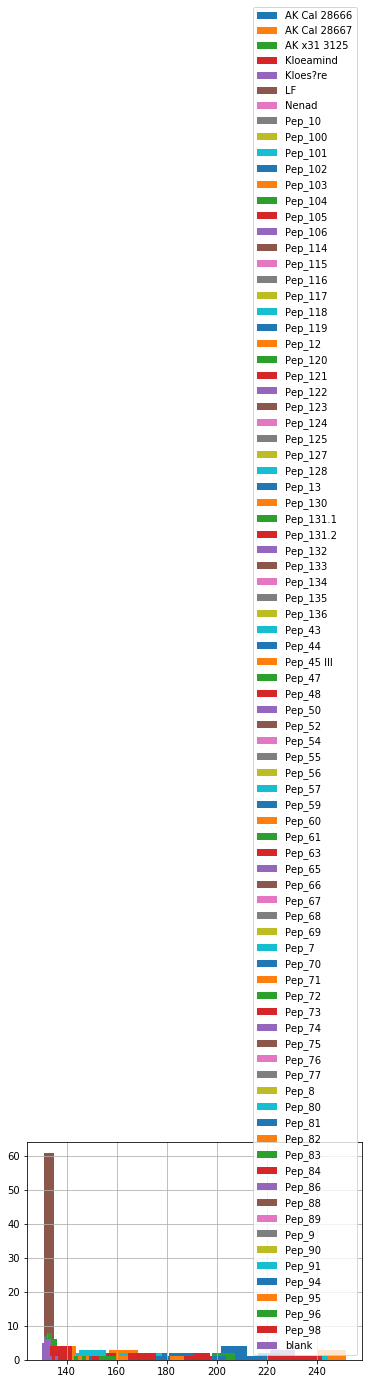

In [12]:
for pb_name, pb_data in spots.groupby(["Name"]):
    pb_data["intensities2"].hist(label=pb_name)
plt.legend()
plt.show()